# Задание
Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, провожу разведывательный анализ данных и составляю отчёт по его результатам.

In [1]:
# Импортирую библиотеки и загружаю исходные данные 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations

df = pd.read_csv('stud_math.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [7]:
# Глобальные переменные и функции выношу в верхний блок
def column_info(data_column, hist_name='None'):
    # На основе типа данных признака выбирается как с ним работать
    if data_column.dtype == 'int64' or data_column.dtype == 'float64':
        
        #Выводятся общие показатели
        display(data_column.describe())
        # Считаются пропуски в данных
        print('Пропущенных значений: {}' .format(data_column[data_column.isnull() == True].size),
              '\nПроцент пропущенных данных: {}%' .format(round(data_column[data_column.isnull() == True].size*100/395)))
        
        # Для поиска выбросов строится график
        sns.countplot(x=data_column, data=df)
        
        
    else:
        # Считаются пропуски в данных
        print('Пропущенных значений: {}' .format(data_column[data_column.isnull() == True].size),
              '\nПроцент пропущенных данных: {}%' .format(round(data_column[data_column.isnull() == True].size*100/395)))
        print('Уникальные значения: {}' .format(data_column.unique()), 
              '\nКоличество уникальных значений: \n{}'.format(data_column.value_counts()))
        
        # Строится график соотношения уникальных значений друг относительно друга
        sns.countplot(x=data_column, data=df)

# Первичная информация о признаках

Пропущенных значений: 0 
Процент пропущенных данных: 0%
Уникальные значения: ['GP' 'MS'] 
Количество уникальных значений: 
GP    349
MS     46
Name: school, dtype: int64


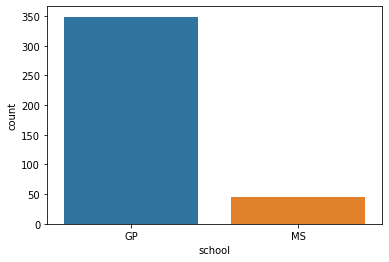

In [8]:
# Школа
column_info(df.school)

Пропущенных значений: 0 
Процент пропущенных данных: 0%
Уникальные значения: ['F' 'M'] 
Количество уникальных значений: 
F    208
M    187
Name: sex, dtype: int64


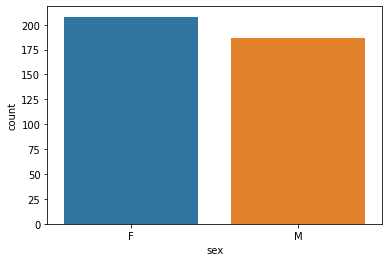

In [10]:
# Пол ученика
column_info(df.sex)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Пропущенных значений: 0 
Процент пропущенных данных: 0%


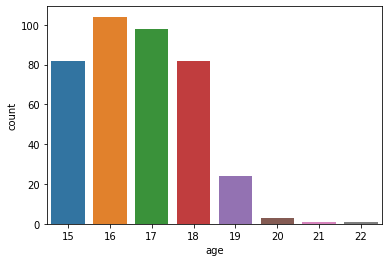

In [11]:
# Возраст учеников
column_info(df.age)

Пропущенных значений: 17 
Процент пропущенных данных: 4%
Уникальные значения: ['U' nan 'R'] 
Количество уникальных значений: 
U    295
R     83
Name: address, dtype: int64


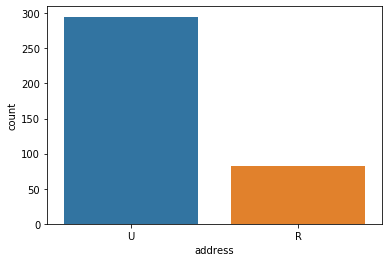

In [12]:
# Адрес
column_info(df.address)

Заменяю пропущенные значения на наиболее часто встречающиеся

In [13]:
df.address = df.address.apply(lambda x: 'U' if pd.isnull(x) else x)

Пропущенных значений: 27 
Процент пропущенных данных: 7%
Уникальные значения: [nan 'GT3' 'LE3'] 
Количество уникальных значений: 
GT3    261
LE3    107
Name: famsize, dtype: int64


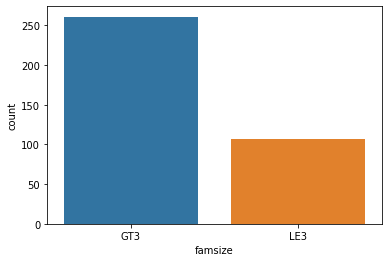

In [14]:
# Количество членов семьи
column_info(df.famsize)

Заменяю пропущенные значения на наиболее часто встречающиеся

In [15]:
df.famsize = df.famsize.apply(lambda x: 'GT3' if pd.isnull(x) else x)

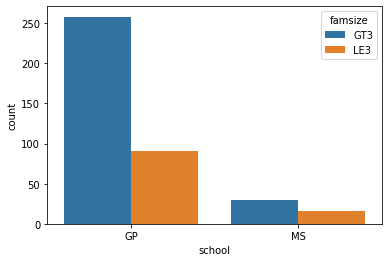

In [16]:
# Исследую зависимость между количеством членов семьи и школой, где учатся дети
sns.countplot(x='school', data=df, hue='famsize')

Из графика видно, что независимо от размера семьи выбирается школа 'GP'

Пропущенных значений: 45 
Процент пропущенных данных: 11%
Уникальные значения: ['A' nan 'T'] 
Количество уникальных значений: 
T    314
A     36
Name: Pstatus, dtype: int64


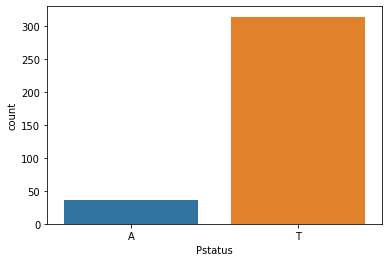

In [18]:
# Раздельное или совместное проживание членов семьи
column_info(df.Pstatus)

Заполняю пропущенные значения наиболее часто встречающимся случаем совместного проживания 'T'

In [19]:
df.Pstatus = df.Pstatus.fillna('T')

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Пропущенных значений: 3 
Процент пропущенных данных: 1%


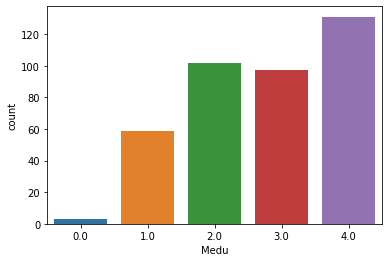

In [21]:
# Образование матери
column_info(df.Medu)

Заполняю пропущенные значения медианой

In [22]:
df.Medu = df.Medu.fillna(3)

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

Пропущенных значений: 24 
Процент пропущенных данных: 6%


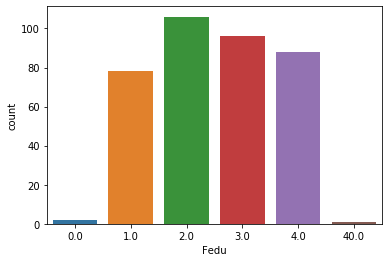

In [24]:
# Образование отца
column_info(df.Fedu)

Устраняю выброс - заменяю значение 40 на 4
Пропуски заменяю медианным значением

In [25]:
df.Fedu = df.Fedu.replace({40:4})
df.Fedu.median()

2.0

In [26]:
df.Fedu = df.Fedu.fillna(2)

In [28]:
# Распределение итоговых баллов в зависимости от образования родителей
display(pd.crosstab(index = df['Fedu'], columns = df['Medu'], values =df.score , aggfunc = 'median'))

Medu,0.0,1.0,2.0,3.0,4.0
Fedu,,,,,
0.0,NaN,80.0,NaN,NaN,50.0
1.0,45.0,50.0,50.0,57.5,NaN
2.0,75.0,55.0,55.0,50.0,67.5
3.0,NaN,40.0,55.0,50.0,55.0
4.0,NaN,65.0,60.0,55.0,60.0


Поскольку корреляция между образованием матери и отца высока, то можно заменить два признака одним - родительским образованием

Пропущенных значений: 19 
Процент пропущенных данных: 5%
Уникальные значения: ['at_home' 'health' 'other' 'services' 'teacher' nan] 
Количество уникальных значений: 
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


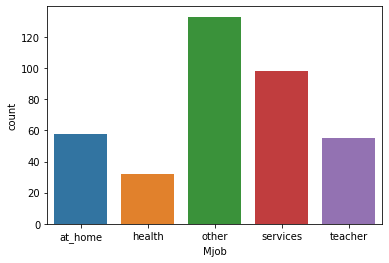

In [30]:
# Работа матери
column_info(df.Mjob)

Заполняю пропуски самым часто встречающимся случаем - "другая" работа

In [31]:
df.Mjob = df.Mjob.fillna('other')

Пропущенных значений: 36 
Процент пропущенных данных: 9%
Уникальные значения: ['teacher' 'other' nan 'health' 'services' 'at_home'] 
Количество уникальных значений: 
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


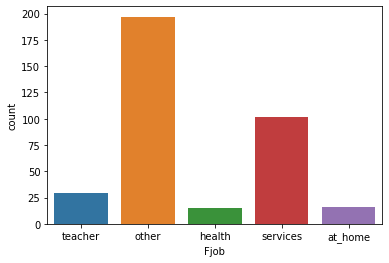

In [33]:
# Работа отца
column_info(df.Fjob)

Заполняю пропуски самым часто встречающимся случаем - "другая" работа

In [34]:
df.Fjob = df.Fjob.fillna('other')

Пропущенных значений: 17 
Процент пропущенных данных: 4%
Уникальные значения: ['course' 'other' 'home' 'reputation' nan] 
Количество уникальных значений: 
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


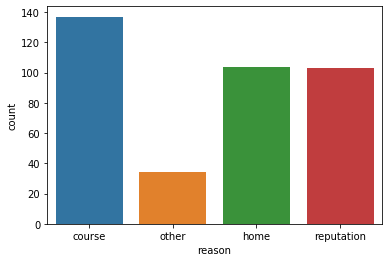

In [35]:
# Причина выбора школы
column_info(df.reason)

Для заполнения пропущенных значений проанализирую значение поля traveltime

In [38]:
df.traveltime[pd.isna(df['reason'])==True]

33     1.0
63     1.0
73     1.0
77     1.0
112    NaN
137    NaN
138    1.0
140    2.0
185    1.0
186    1.0
196    1.0
263    1.0
335    1.0
363    1.0
373    1.0
382    2.0
394    1.0
Name: traveltime, dtype: float64

Поскольку значение признака довольно мало, сделаю предположение, что для учеников с пропущенными значениями причиной выбора
скорее всего стала близость к дому. Заполняю пропуски этим значением.

In [39]:
df.reason = df.reason.fillna('home')

Пропущенных значений: 31 
Процент пропущенных данных: 8%
Уникальные значения: ['mother' 'father' 'other' nan] 
Количество уникальных значений: 
mother    250
father     86
other      28
Name: guardian, dtype: int64


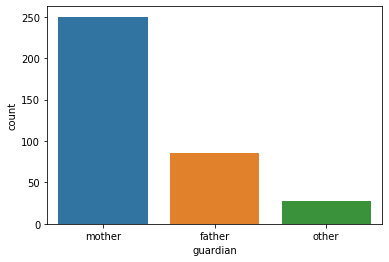

In [40]:
# Опекунство
column_info(df.guardian)

Чаще всего опекуном является мать, поэтому заполняю пропуски этим значением

In [41]:
df.guardian = df.guardian.fillna('mother')

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Пропущенных значений: 28 
Процент пропущенных данных: 7%


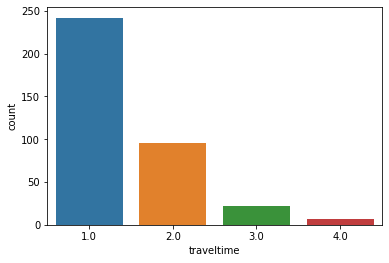

In [43]:
# Время в пути до школы
column_info(df.traveltime)

Заполняю пропуски медианным значением

In [44]:
df.traveltime = df.traveltime.fillna(1)

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Пропущенных значений: 7 
Процент пропущенных данных: 2%


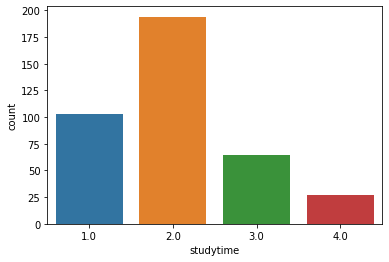

In [46]:
# Время на учёбу помимо школы в неделю
column_info(df.studytime)

Заполняю пропуски медианным значением

In [47]:
df.studytime.median()

2.0

In [92]:
df.studytime = df.studytime.fillna(2)

Обращаю внимание на признак studytime, granular. Нахожу его связь со studytime

In [93]:
print(df[['studytime','studytime, granular']].corr())

                     studytime  studytime, granular
studytime                  1.0                 -1.0
studytime, granular       -1.0                  1.0


 Это 100% обратная зависимость, поэтому данный признак можно убрать насовсем из выборки

In [94]:
df.drop(['studytime, granular'], axis=1, inplace = True)

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Пропущенных значений: 22 
Процент пропущенных данных: 6%


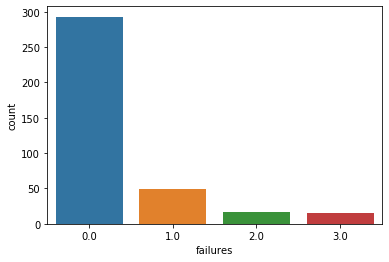

In [50]:
# Количество внеучебных неудач
column_info(df.failures)

Заполняю пропуски самым частым значением

In [51]:
df.failures = df.failures.fillna(0)

Пропущенных значений: 9 
Процент пропущенных данных: 2%
Уникальные значения: ['yes' 'no' nan] 
Количество уникальных значений: 
no     335
yes     51
Name: schoolsup, dtype: int64


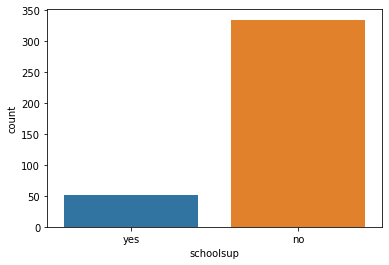

In [54]:
# Дополнительная образовательная поддержка
column_info(df.schoolsup)

Заполняю пропуски самым частым и явно преобладающим значением

In [55]:
df.schoolsup = df.schoolsup.fillna('no')

Пропущенных значений: 39 
Процент пропущенных данных: 10%
Уникальные значения: ['no' 'yes' nan] 
Количество уникальных значений: 
yes    219
no     137
Name: famsup, dtype: int64


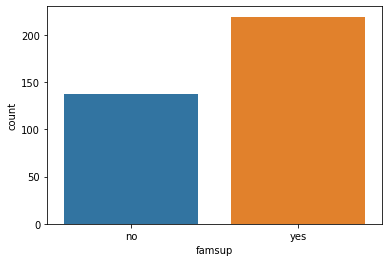

In [56]:
# Семейная образовательная поддержка
column_info(df.famsup)

Рассмотриваю зависимость между уровнем образования родителей и семейной образовательной поддержкой.
Заполняю "да" для более чем в среднем образованных родителей, удаляю остаточные пропуски.

In [59]:
for i in df.famsup[((df.Medu >= 2) | (df.Fedu >= 2)) & (pd.isna(df['famsup'])==True)].index:
    df.at[i,'famsup'] = 'yes'
for i in df.famsup[pd.isna(df['famsup'])==True].index:
    df['famsup'].drop(i)    

Пропущенных значений: 40 
Процент пропущенных данных: 10%
Уникальные значения: ['no' nan 'yes'] 
Количество уникальных значений: 
no     200
yes    155
Name: paid, dtype: int64


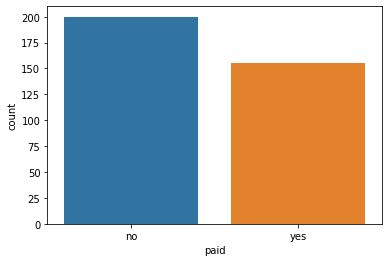

In [61]:
# Дополнительные платные занятия по математике
column_info(df.paid)

Оставляю пропуски нетронутыми, неизвестно как влиет данный номинативный признак на итоговый балл

Пропущенных значений: 14 
Процент пропущенных данных: 4%
Уникальные значения: ['no' 'yes' nan] 
Количество уникальных значений: 
yes    195
no     186
Name: activities, dtype: int64


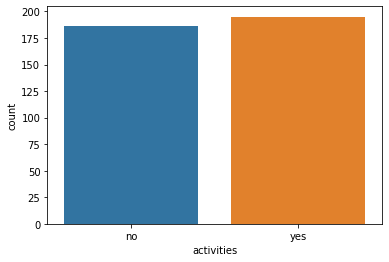

In [62]:
# Дополнительные внеучебные занятия
column_info(df.activities)

Оставляю пропуски нетронутыми, неизвестно как влиет данный номинативный признак на итоговый балл

Пропущенных значений: 16 
Процент пропущенных данных: 4%
Уникальные значения: ['yes' 'no' nan] 
Количество уникальных значений: 
yes    300
no      79
Name: nursery, dtype: int64


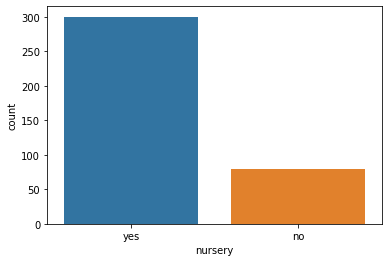

In [63]:
# Посещение детского сада
column_info(df.nursery)

Подавляющее большинство ходило в детский сад, поэтому заполним незначительное число пропусков значением "да"

In [64]:
df.nursery = df.nursery.fillna('yes')

Пропущенных значений: 20 
Процент пропущенных данных: 5%
Уникальные значения: ['yes' nan 'no'] 
Количество уникальных значений: 
yes    356
no      19
Name: higher, dtype: int64


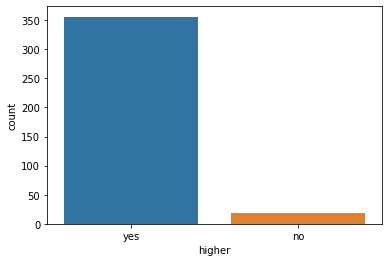

In [65]:
# Желание получить высшее образование
column_info(df.higher)

У подавляющего большинства есть желание, поэтому заполняем пропуски значением "да"

In [66]:
df.higher = df.higher.fillna('yes')

Пропущенных значений: 34 
Процент пропущенных данных: 9%
Уникальные значения: [nan 'yes' 'no'] 
Количество уникальных значений: 
yes    305
no      56
Name: internet, dtype: int64


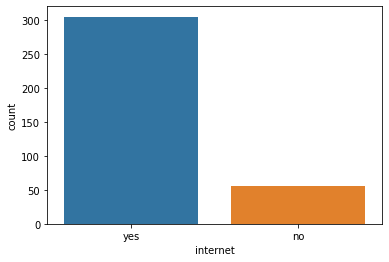

In [67]:
# Наличие интернета дома
column_info(df.internet)

У подавляющего большинства есть интернет, поэтому заполняем пропуски значением "да"

In [68]:
df.internet = df.internet.fillna('yes')

Пропущенных значений: 31 
Процент пропущенных данных: 8%
Уникальные значения: ['no' nan 'yes'] 
Количество уникальных значений: 
no     240
yes    124
Name: romantic, dtype: int64


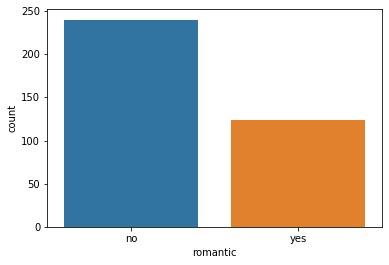

In [69]:
# Наличие романтических отношений
column_info(df.romantic)

Рассматриваю зависимость романтических отношений от возраста

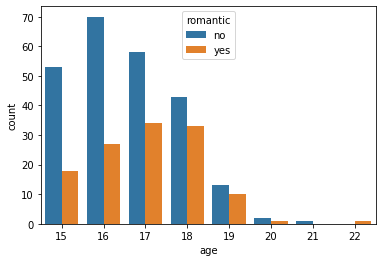

In [70]:
sns.countplot(x='age', data=df, hue='romantic')

Чем младше ученик, тем выше вероятность, что романтических отношений нет, поэтому для возраста 15-17 лет выставлю
отрицательное значение признака, а остальные пропуски удалю

In [72]:
for i in df.romantic[(df.age < 18) & (pd.isna(df['romantic'])==True)].index:
    df.at[i,'romantic'] = 'no'
for i in df.romantic[pd.isna(df['romantic'])==True].index:
    df = df.drop(i)    

count    362.000000
mean       3.936464
std        0.931949
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Пропущенных значений: 26 
Процент пропущенных данных: 7%


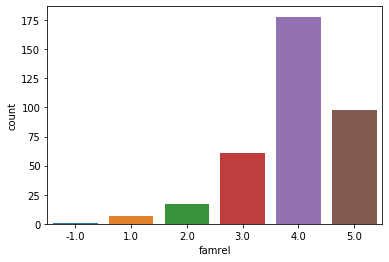

In [73]:
# Семейные отношения
column_info(df.famrel)

Устраняю выброс и заполняю пропуски медианным значением

In [74]:
df.famrel = df.famrel.replace({-1:1})
df.famrel.median()

4.0

In [75]:
df.famrel = df.famrel.fillna(4)

count    378.000000
mean       3.222222
std        0.987096
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Пропущенных значений: 10 
Процент пропущенных данных: 3%


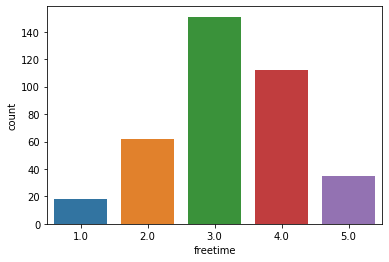

In [77]:
# Свободное время после школы
column_info(df.freetime)

Заполняю пропуски медианой

In [78]:
df.freetime = df.freetime.fillna(3)

count    380.000000
mean       3.102632
std        1.117146
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Пропущенных значений: 8 
Процент пропущенных данных: 2%


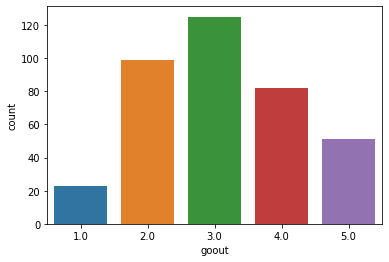

In [79]:
# Проведение времени с друзьями
column_info(df.goout)

Заполняю пропуски медианой

In [80]:
df.goout = df.goout.fillna(3)

count    375.000000
mean       3.533333
std        1.396456
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Пропущенных значений: 13 
Процент пропущенных данных: 3%


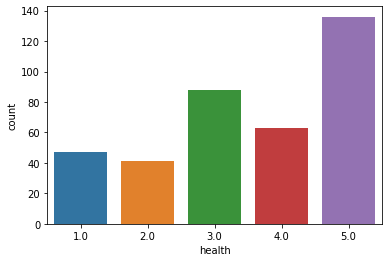

In [81]:
# Текущее состояние здоровья
column_info(df.health)

Выберу усредненное значение для заполнения пропусков

In [82]:
df.health.median()

4.0

In [83]:
df.health = df.health.fillna(4)

count    376.000000
mean       7.335106
std       23.671855
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Пропущенных значений: 12 
Процент пропущенных данных: 3%


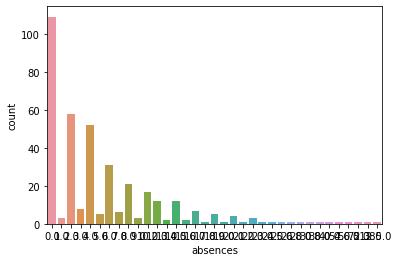

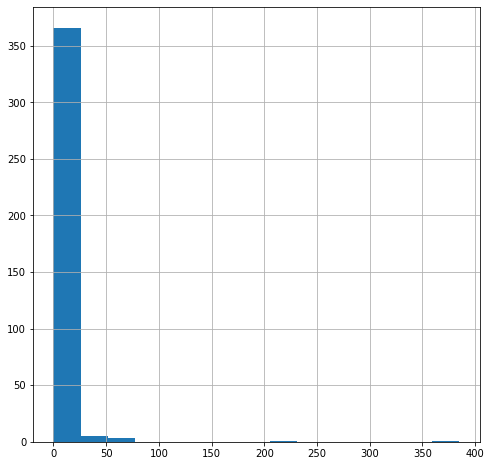

In [84]:
# Количество пропущенных занятий
column_info(df.absences)
plt.figure(figsize=(8,8))
df.absences.hist(bins=15)

Рассматриваю связь между пропусками и здоровьем

In [85]:
df.health[df.absences > 50]

74     5.0
183    1.0
222    3.0
276    5.0
390    4.0
Name: health, dtype: float64

Зависимости не наблюдается, а поскольку таких случаев всего 5 можно исключить их из выборки как выбросы

In [86]:
for i in df[df.absences > 50].index:
    df = df.drop(i)

Рассчитываю медиану по оставшимся данным и заполняю ей пропуски

In [87]:
df.absences.median()

4.0

In [88]:
df.absences = df.absences.fillna(4)

count    377.000000
mean      52.307692
std       22.979079
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Пропущенных значений: 6 
Процент пропущенных данных: 2%


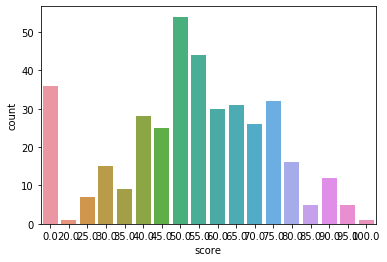

In [89]:
# Баллы по госэкзамену по математике
column_info(df.score)

Для целевого признака заполнение столь малого количества пропусков можно проигнорировать, а впоследствии использовать эти пропущенные значения как предсказания модели

In [90]:
for i in df[pd.isnull(df.score)==True].index:
    df = df.drop(i)

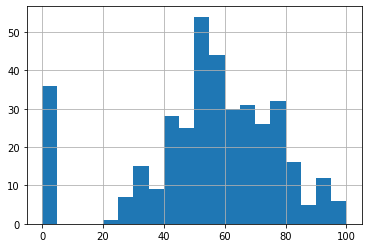

In [91]:
df.score.hist(bins=20)

Видно, что есть нулевые результаты - возможно это аннулированные экзамены за списывание. Исключать их из выборки нельзя
до уточнения данных о нулевом балле у заказчика. Рассмотрю корреляцию нашего целевого признака со всеми остальными.

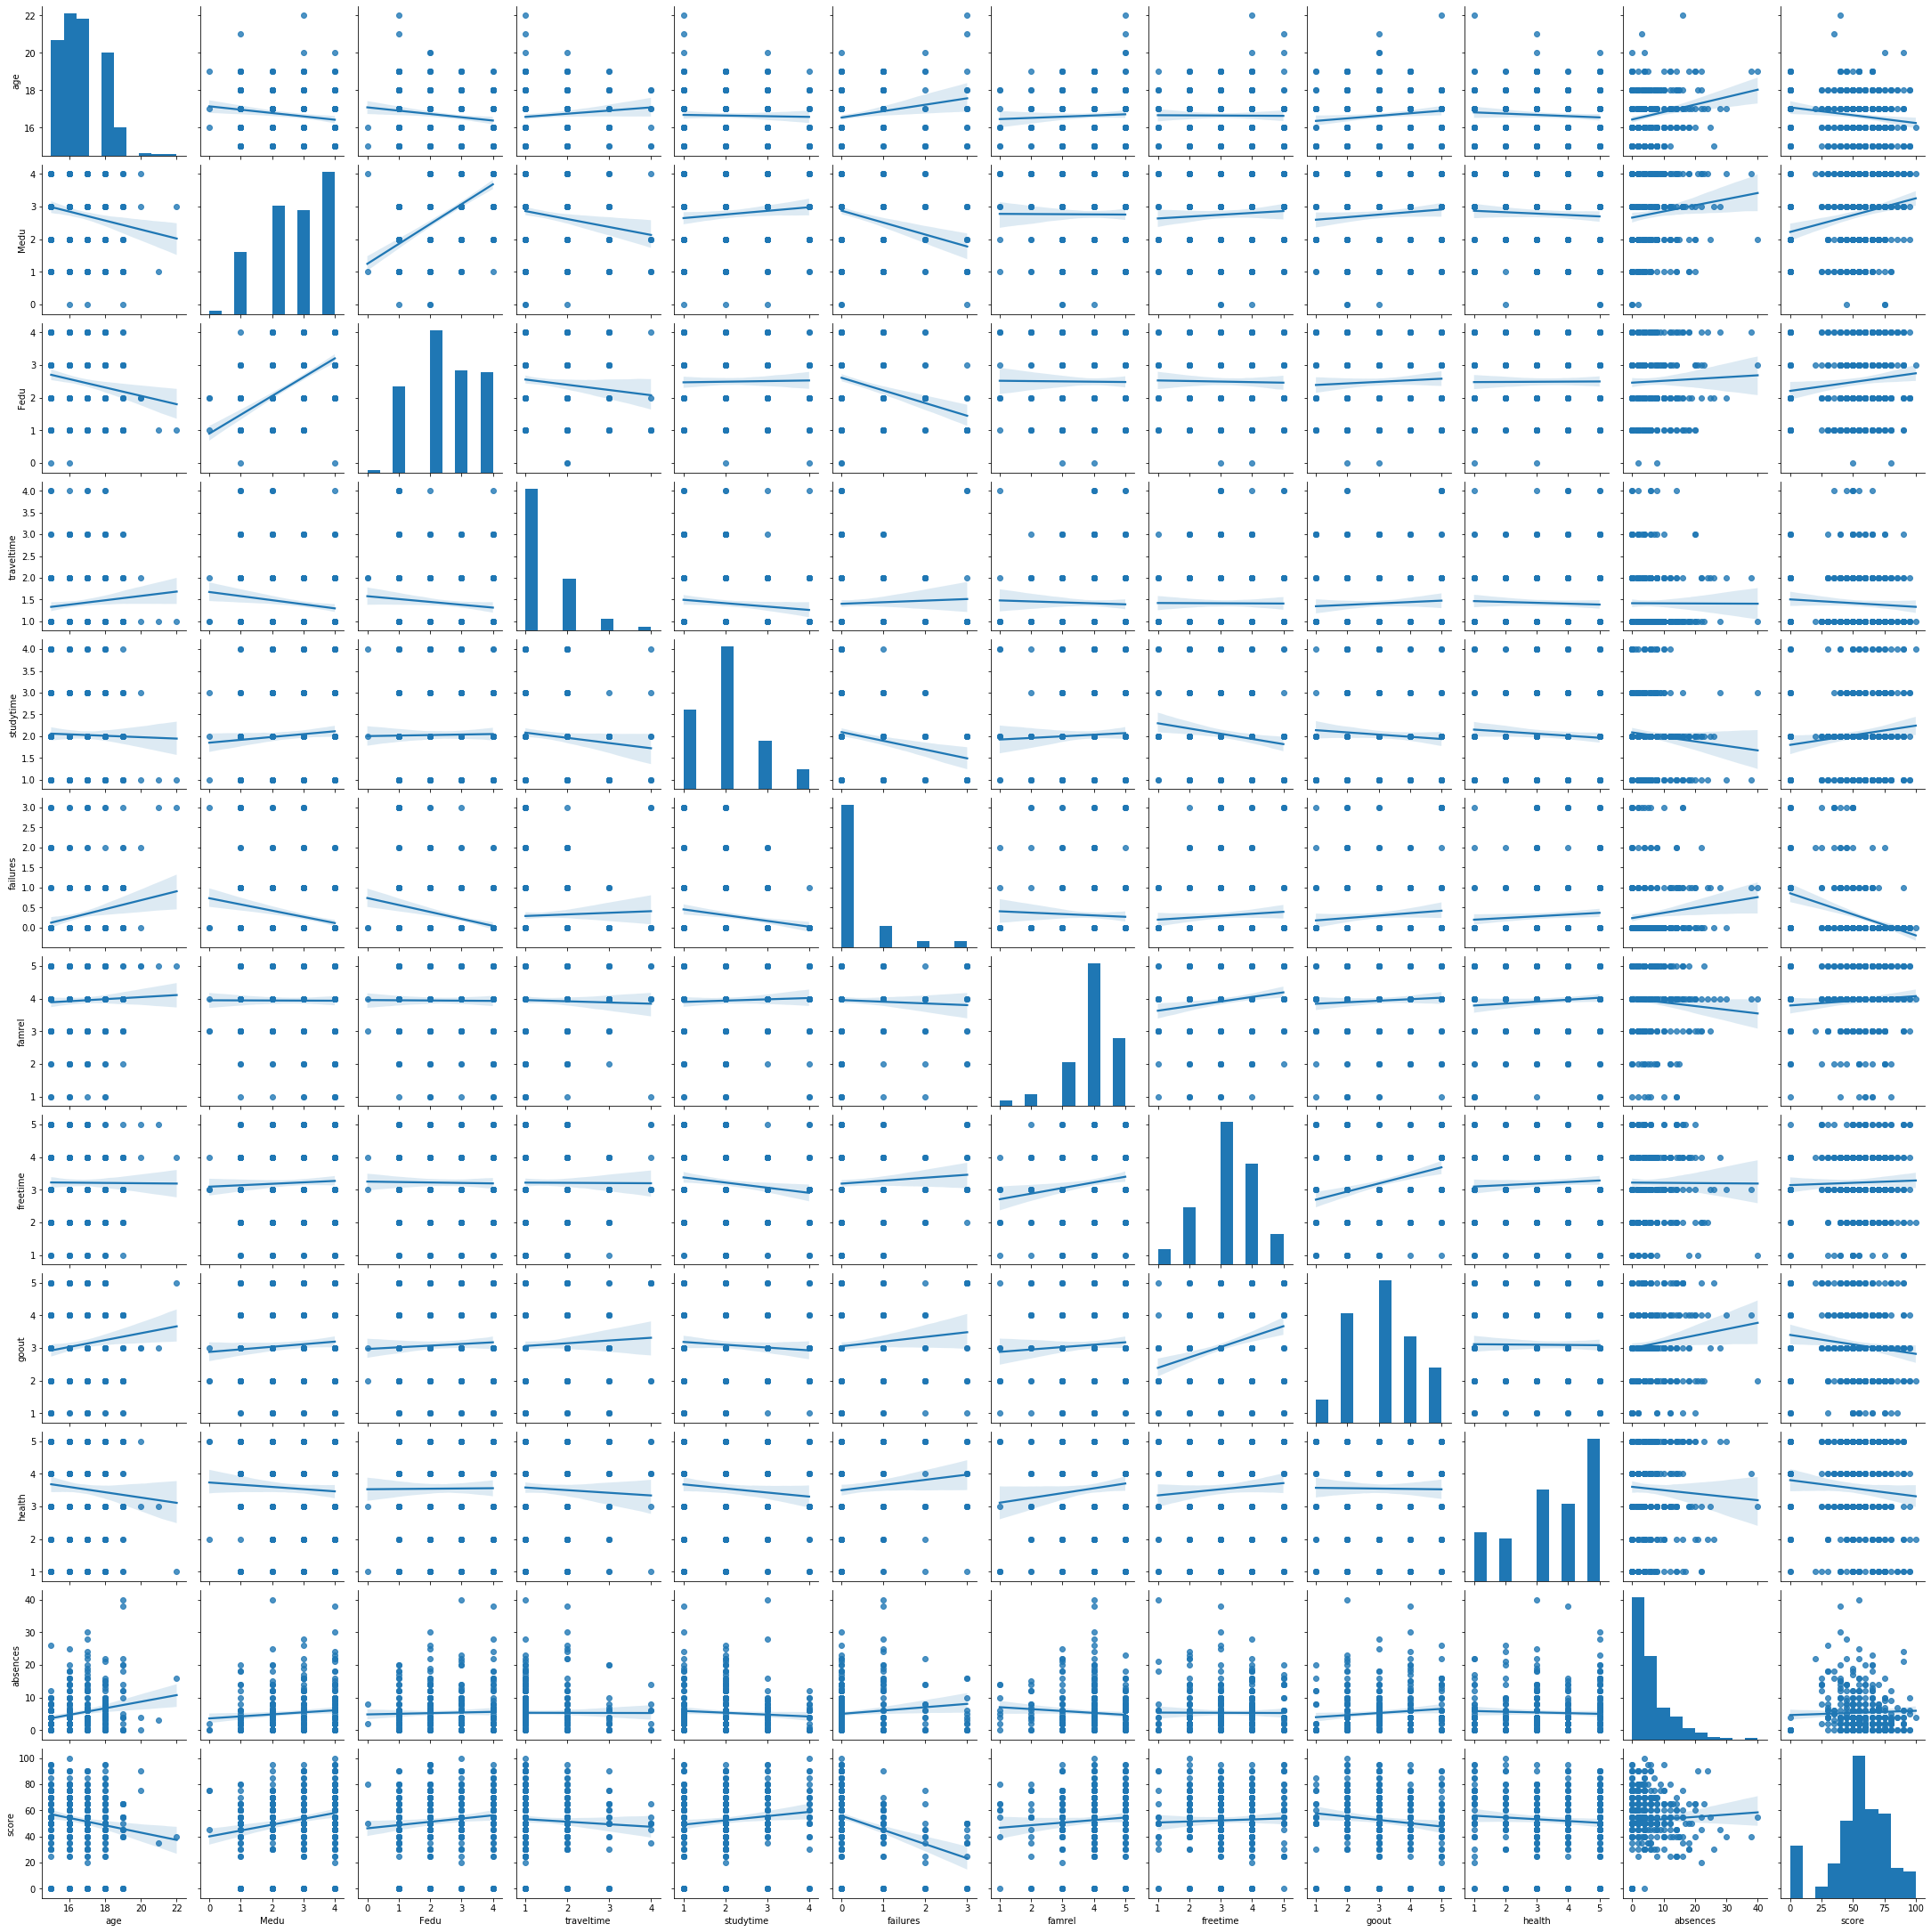

In [95]:
sns.pairplot(df, kind = 'reg')

In [96]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.157618,-0.150966,0.092185,-0.024143,0.196193,0.045053,-0.006392,0.120087,-0.074021,0.201157,-0.153573
Medu,-0.157618,1.000000,0.592340,-0.151417,0.085312,-0.237810,-0.004109,0.050033,0.078591,-0.054051,0.108194,0.215032
Fedu,-0.150966,0.592340,1.000000,-0.102420,0.015102,-0.259416,-0.007861,-0.015468,0.049466,0.006235,0.033243,0.115819
traveltime,0.092185,-0.151417,-0.102420,1.000000,-0.096395,0.038109,-0.028760,-0.004421,0.051857,-0.040197,-0.002575,-0.057607
studytime,-0.024143,0.085312,0.015102,-0.096395,1.000000,-0.169923,0.038407,-0.137518,-0.066003,-0.076405,-0.076968,0.119909
failures,0.196193,-0.237810,-0.259416,0.038109,-0.169923,1.000000,-0.042049,0.066533,0.093115,0.082538,0.115474,-0.337055
famrel,0.045053,-0.004109,-0.007861,-0.028760,0.038407,-0.042049,1.000000,0.155563,0.058409,0.093518,-0.081670,0.074918
freetime,-0.006392,0.050033,-0.015468,-0.004421,-0.137518,0.066533,0.155563,1.000000,0.280793,0.066047,-0.004854,0.033396
goout,0.120087,0.078591,0.049466,0.051857,-0.066003,0.093115,0.058409,0.280793,1.000000,-0.009121,0.111141,-0.120721
health,-0.074021,-0.054051,0.006235,-0.040197,-0.076405,0.082538,0.093518,0.066047,-0.009121,1.000000,-0.046841,-0.082259


# Промежуточные выводы корреляционного анализа

Сильная обратная корреляция есть у количественных признаков score и failures - чем меньше внеучебных неудач у ученика,
тем выше его балл. Также есть сильная обратная корреляция у итоговых баллов и возраста - чем меньше age, тем выше балл.
Для номинативных признаков проведу анализ с использованием t-критерия Стьюдента.

Найдены статистически значимые различия для колонки sex


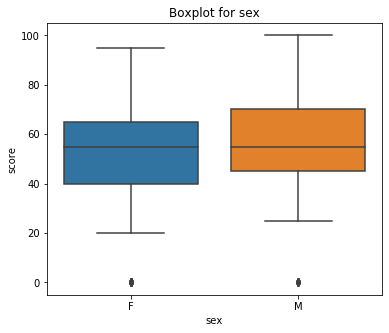

Найдены статистически значимые различия для колонки address


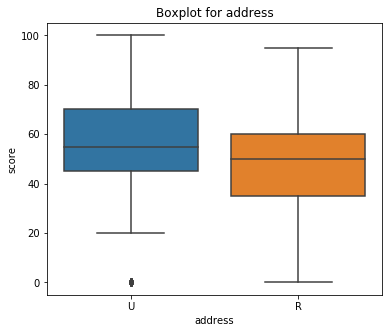

Найдены статистически значимые различия для колонки Mjob


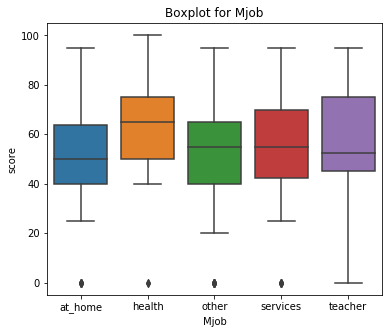

Найдены статистически значимые различия для колонки Medu


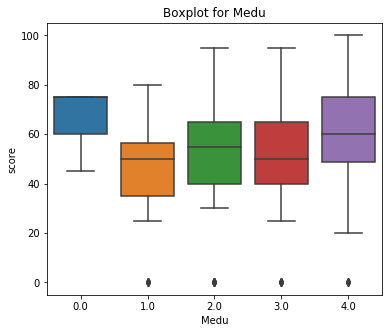

Найдены статистически значимые различия для колонки schoolsup


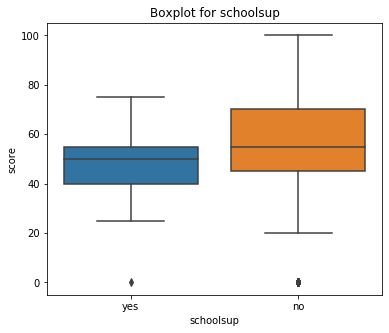

Найдены статистически значимые различия для колонки higher


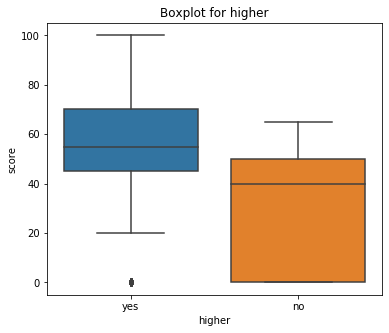

Найдены статистически значимые различия для колонки romantic


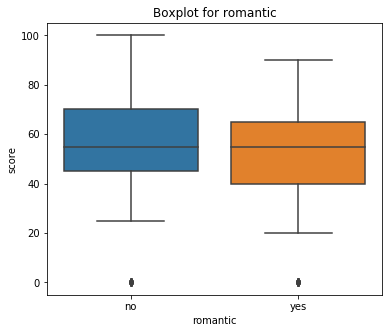

In [100]:
def nominal_analize(column):
    # Все уникальные значения признака
    cols = df[column].value_counts().index
    
    # Составляем все комбинации из списка уникальных значений,
    # рассматриваемого признака.
    all_comb = list(combinations(cols,2))
    
    # Применяем t-тест Стьюдента для всех полученных комбинаций и пытаемся
    # найти статистическую разницу в распределении целевой переменной score.

    for comb in all_comb:
        if stats.ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                     <= 0.05/len(all_comb): 
            print('Найдены статистически значимые различия для колонки', column)            
            # Строим boxplot если находим статистическую разницу
            fig, ax = plt.subplots(figsize=(6,5))
            sns.boxplot(x=column, y='score', data=df, ax=ax)
            ax.set_title('Boxplot for '+column)
            plt.show()
            break
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
           'Mjob', 'Fjob', 'Medu', 'Fedu', 'reason', 'guardian', 'traveltime', 'studytime',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
           'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
           'health']:
    nominal_analize(col)            

Получилось 7 значимых признаков, которые возможно оказывают влияние на итоговую оценку по математике:
sex, address, Mjob, Medu, schoolsup, higher, romantic. Объеденим значимые номинативные признаки с числовыми признаками
(age, failures), которые сильно коррелируют с целевой переменной в новый датафрейм.

In [101]:
model_df = df.loc[:, ['age', 'sex', 'address', 'Medu', 'Mjob', 'failures',
                          'schoolsup', 'higher', 'romantic', 'score']]

model_df.head()

,age,sex,address,Medu,Mjob,failures,schoolsup,higher,romantic,score
0,18,F,U,4.0,at_home,0.0,yes,yes,no,30.0
1,17,F,U,1.0,at_home,0.0,no,yes,no,30.0
2,15,F,U,1.0,at_home,3.0,yes,yes,no,50.0
3,15,F,U,4.0,health,0.0,no,yes,yes,75.0
4,16,F,U,3.0,other,0.0,no,yes,no,50.0


# Основные итоги работы

В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

В данных в целом достаточно мало пустых значений.

Числовых параметров мало - age,absences,score. Остальные номинативные.

На этапе осмотра данных был выявлен полностью скоррелированный с другим столбец studytime, granular. Этот столбец исключен.

В целевой переменной score обнаружено много значений 0 - обязательно уточнить у заказчика, что это означает, для последующих выводов.

Пропуски во многих столбцах можно будет попытаться заполнять на следующем этапе при построении, и оценке модели.

Выбросы найдено очень мало, что позволяет сделать вывод о том, что данные достаточно чистые.

В базе данных много признаков, не оказывающих сильного влияния на целевой балл.

Самые важные признаки, которые предлагается использовать в дальнейшем для построения модели были выбраны на основе Теста Стьюдента: sex, address, Mjob, Medu, schoolsup, higher, romantic, age, failures и score.